#             Decision Tree


## Part I   Using Titanic data
1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.
 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)
 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.
 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.
 5. Run through steps 2-4 using a different max_depth value.
 6. Which model performs better on your in-sample data?
 7. Which model performs best on your out-of-sample data, the validate set?

In [1]:
#Tabular data imports:
import pandas as pd
import numpy as np

#Visualization imports:
import matplotlib.pyplot as plt

#Imports we need for assessing the performance of our model:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

#Importing the functions for fetching the data:
import acquire
    
#Importing functions for prepping the data that's fetched:
import prepare

# Import module to prep data for modeling
import model

In [2]:
# Acquire data
df = acquire.get_titanic_data()
df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


#### Prepare

In [3]:
df = prepare.clean_titanic(df)
df.sample(5)

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
420,0,3,male,0,0,7.8958,Cherbourg,1
660,1,1,male,2,0,133.6500,Southampton,0
548,0,3,male,1,1,20.5250,Southampton,0
185,0,1,male,0,0,50.0000,Southampton,1
456,0,1,male,0,0,26.5500,Southampton,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    object 
 2   sex          891 non-null    object 
 3   sibsp        891 non-null    int64  
 4   parch        891 non-null    int64  
 5   fare         891 non-null    float64
 6   embark_town  891 non-null    object 
 7   alone        891 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 55.8+ KB


In [5]:
# prepare titanic for modeling
df =model.preprocess_titanic(df)


####  Explore 

In [6]:
# lets split our data into 3 - train,validate,test
train, validate, test = prepare.split_data(df, 'survived')

train: 534 (60.0% of 891)
validate: 178 (20.0% of 891)
test: 179 (20.0% of 891)


In [7]:
train


,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
776,0,3,0,0,7.7500,1,1,1,0
829,1,1,0,0,80.0000,1,0,0,1
215,1,1,1,0,113.2750,0,0,0,0
258,1,1,0,0,512.3292,1,0,0,0
129,0,3,0,0,6.9750,1,1,0,1
...,...,...,...,...,...,...,...,...,...
125,1,3,1,0,11.2417,0,1,0,0
360,0,3,1,4,27.9000,0,1,0,1
55,1,1,0,0,35.5000,1,1,0,1
298,1,1,0,0,30.5000,1,1,0,1


### 1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [8]:
# Counts for target value: survived
train.survived.value_counts()
# mode is not survived or 0, can also use the parameter normalize= True to see proportions of value counts

survived
0    329
1    205
Name: count, dtype: int64

- Baseline prediction is done by predicting the mean of the target variable (for a regression problem) or   predicting the most prevalent class i.e mode(for a classification problem).




In [9]:
#instances in the training dataset where the 'survived' column has a value of 0 (not surviving)

baseline_accuracy = (train['survived'] == 0).mean()
print(f"Baseline_accuracy of individuals who did not survive the Titanic shipwreck:{baseline_accuracy:.2%}")


Baseline_accuracy of individuals who did not survive the Titanic shipwreck:61.61%


> Baseline Prediction: 0


> Baseline Accuracy: 61.6%   

### 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [10]:
# Splitting the dataset into features (X) and target labels (y) for training, validation, and testing sets
# Extracting features by removing the 'survived' column

# For training set
X_train = train.drop(columns='survived')
y_train = train.survived

# For validation set
X_val = validate.drop(columns='survived')
y_val = validate.survived

# For testing set
X_test = test.drop(columns='survived')
y_test = test.survived


In [11]:
X_train.head(2)

,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
776,3,0,0,7.75,1,1,1,0
829,1,0,0,80.00,1,0,0,1


In [12]:
# Make the model

#If we don't set the max_depth there are chances of overfitting
#So choose a max_depth to avoid overfitting
clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10)



In [13]:
# Fit the model 
clf = clf.fit(X_train, y_train)

In [14]:
# Use the model
# Evaluate the model's performance on train, first
y_predictions = clf.predict(X_train)

 ### 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [15]:
y_predictions_df = pd.DataFrame({
    'y_true': y_train.values,
    'baseline':0,
    'dt_one': clf.predict(X_train)
}, index=train.index)

In [16]:
y_predictions_df.head()

,y_true,baseline,dt_one
776,0,0,0
829,1,0,1
215,1,0,1
258,1,0,1
129,0,0,0


In [17]:
# model score
accuracy_score(y_predictions_df.y_true, y_predictions_df.dt_one)


0.8146067415730337

In [18]:
# another way
# print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))

In [19]:
# confusion matrix

confusion_matrix(y_train, y_predictions)

array([[293,  36],
       [ 63, 142]])

In [20]:
# classification report
print(classification_report(y_train, y_predictions))


              precision    recall  f1-score   support

           0       0.82      0.89      0.86       329
           1       0.80      0.69      0.74       205

    accuracy                           0.81       534
   macro avg       0.81      0.79      0.80       534
weighted avg       0.81      0.81      0.81       534



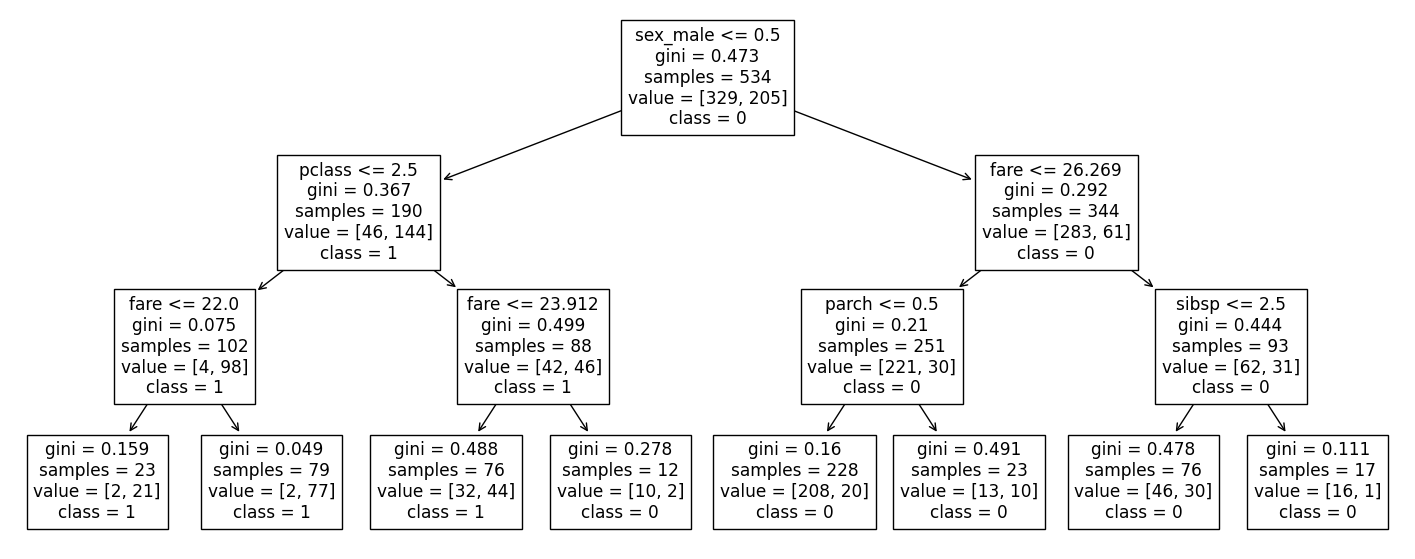

In [21]:
# Using plot_tree to visualize the decision tree model 'clf'
# Feature names are provided for better node labeling taken from X_train.columns
# Class names '0' and '1' correspond to the two classes in the binary classification of the Titanic dataset 
# (not survived  and survived)

plt.figure(figsize=(18, 7))
plot_tree(clf, feature_names=X_train.columns.tolist(), class_names=['0','1'])
plt.show()

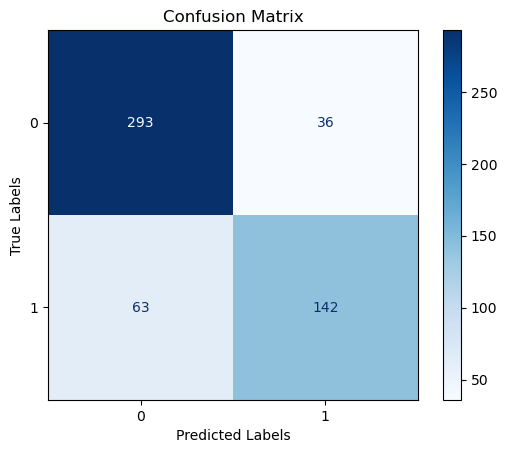

In [22]:
# print confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# y_train contains the true labels and y_predictions contains the predicted labels
cm = confusion_matrix(y_train, y_predictions)
display_labels = ['0', '1']  

# Create a ConfusionMatrixDisplay object
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)

# Set the colormap and plot the confusion matrix
confusion_matrix_display.plot(cmap=plt.cm.Blues)  

# Add title and axis labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Show the plot
plt.show()


In [23]:
# confusion matrix

confusion_matrix(y_train, y_predictions)

array([[293,  36],
       [ 63, 142]])

### 4.Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [24]:
def compute_metrics(TN,FP,FN,TP):
    all_ = (TP + TN + FP + FN)

    accuracy = (TP + TN) / all_

    TPR = recall = TP / (TP + FN)
    FPR = FP / (FP + TN)

    TNR = TN / (FP + TN)
    FNR = FN / (FN + TP)

    precision =  TP / (TP + FP)
    f1 =  2 * ((precision * recall) / ( precision + recall))

    support_pos = TP + FN
    support_neg = FP + TN

    print(f"Accuracy: {accuracy}\n")
    print(f"True Positive Rate/Sensitivity/Recall/Power: {TPR}")
    print(f"False Positive Rate/False Alarm Ratio/Fall-out: {FPR}")
    print(f"True Negative Rate/Specificity/Selectivity: {TNR}")
    print(f"False Negative Rate/Miss Rate: {FNR}\n")
    print(f"Precision/PPV: {precision}")
    print(f"F1 Score: {f1}\n")
    print(f"Support (0): {support_pos}")
    print(f"Support (1): {support_neg}")

confusion = confusion_matrix(y_train,clf.predict(X_train))
TN, FP, FN, TP = confu.ravel()
TN, FP, FN, TP 


TN

compute_metrics(TN,FP,FN,TP)

In [25]:
#OR

In [26]:
labels = sorted(y_train.unique())
labels
confusion_df = pd.DataFrame(cm, index=[f'{label} actual' for label in labels], columns=[f'{label} predict' for label in labels])
confusion_df

,0 predict,1 predict
0 actual,293,36
1 actual,63,142


### 5.Run through steps 2-4 using a different max_depth value.

In [27]:
#for one
tree2 = DecisionTreeClassifier(max_depth=10, random_state=7)
tree2 = tree2.fit(X_train, y_train)
tree2.score(X_train, y_train)

0.9400749063670412

In [28]:
#for many
for x in range(1,20):
#     print(x)
    tree = DecisionTreeClassifier(max_depth=x, random_state=7)
    tree.fit(X_train, y_train)
    acc = tree.score(X_train, y_train)
    print(f'for depth of {x:2}, the accuracy is {round(acc,2)}')

for depth of  1, the accuracy is 0.8
for depth of  2, the accuracy is 0.8
for depth of  3, the accuracy is 0.81
for depth of  4, the accuracy is 0.82
for depth of  5, the accuracy is 0.86
for depth of  6, the accuracy is 0.88
for depth of  7, the accuracy is 0.9
for depth of  8, the accuracy is 0.92
for depth of  9, the accuracy is 0.93
for depth of 10, the accuracy is 0.94
for depth of 11, the accuracy is 0.94
for depth of 12, the accuracy is 0.94
for depth of 13, the accuracy is 0.95
for depth of 14, the accuracy is 0.95
for depth of 15, the accuracy is 0.95
for depth of 16, the accuracy is 0.95
for depth of 17, the accuracy is 0.95
for depth of 18, the accuracy is 0.95
for depth of 19, the accuracy is 0.95


In [29]:
#This function iterates through different max depths of a decision tree classifier, 
#evaluates its training and validation accuracies, stores the results in a DataFrame,
#and displays the top-performing configurations by validation accuracy.

#empty list created to store the results for different configurations of the decision tree classifier
scores_all = []

#loop iterates through values from 1 to 19
for x in range(1,20):

    #Create and Train Tree on training data
    tree = DecisionTreeClassifier(max_depth=x, random_state=7)
    tree.fit(X_train, y_train)
    
    # evaluate on train using score method on the train data 
    train_acc = tree.score(X_train, y_train)
    
    #Evaluate Validation accuracy on validate data using score method  
    val_acc = tree.score(X_val, y_val)
    
    #Append results
    scores_all.append([x, train_acc, val_acc])
    
# converts the scores_all list of lists into a pandas DataFrame named scores_df and assigns columns 
# max_depth','train_acc','val_acc'    
scores_df = pd.DataFrame(scores_all, columns=['max_depth','train_acc','val_acc'])
scores_df = pd.DataFrame(scores_all, columns=['max_depth','train_acc','val_acc'])
#sorts the DataFrame scores_df in descending order based on the 'val_acc' column
scores_df.sort_values(by=['val_acc'], ascending=False)

,max_depth,train_acc,val_acc
2,3,0.814607,0.786517
5,6,0.882022,0.786517
12,13,0.947566,0.786517
18,19,0.947566,0.780899
11,12,0.943820,0.780899
17,18,0.947566,0.780899
16,17,0.947566,0.780899
6,7,0.897004,0.780899
15,16,0.947566,0.780899
14,15,0.947566,0.780899


### 6.Which model performs better on your in-sample data?

- look at the highest training accuracy achieved among all the models you trained.



> The optimal model would be with a max depth of 15 or greater

- The model's performance on the data it was trained on (i.e., the training data)
- A higher training accuracy indicates that the model is overfitting the training data, but it doesn't necessarily mean the model will perform as well on new, unseen data (i.e., the validation or test data).

In [30]:
best_training_accuracy = scores_df['train_acc'].max()
best_training_accuracy

0.947565543071161

### 7.Which model performs best on your out-of-sample data, the validate set?

- Out-of-sample data -The model's performance on data it hasn't seen during training, specifically the validation data

In [31]:
best_validation_accuracy = scores_df['val_acc'].max()
best_validation_accuracy

0.7865168539325843

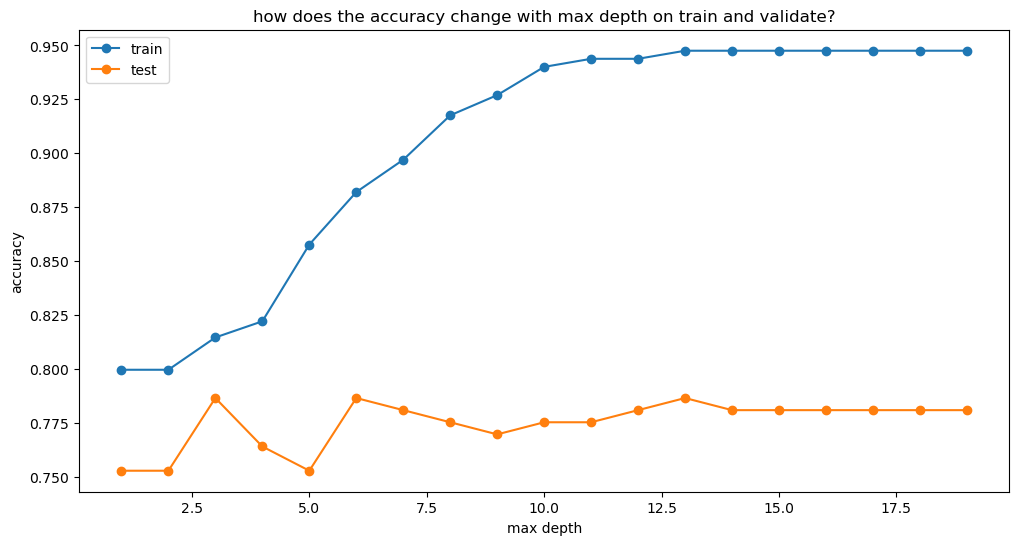

In [32]:
#Visualize how accuracy changes with different maximum depths for a decision tree classifier on both the training 
#and validation sets

plt.figure(figsize=(12,6))
plt.plot(scores_df.max_depth, scores_df.train_acc, label='train', marker='o')
plt.plot(scores_df.max_depth, scores_df.val_acc, label='test', marker='o')
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.title('how does the accuracy change with max depth on train and validate?')
plt.legend()
plt.show()


> This chart highlights a fundamental topic called the bias variance trade off...

> Overfitting vs Underfitting

> Imagine a scatter plot so theres an x and y axis with various data points

> Underfitting (High Bias) would be drawing a straight line horizontally so hitting a small minority of the data. High train/test error because its failing to capture the data, to make accurate predictions

> Overfitting (High Variance) would be drawing a line through every single point of that line. Low train error because its fitting to the data so closely and high test error because it can't generlaize well

> Goal is to acheive a model that performs well in terms of your metrics/that predicts well on training and test data

 

very close, but model with depth = 3

In [36]:
# max depth = 1 
tree = DecisionTreeClassifier(max_depth=1, random_state= 42)
out_tree = tree.fit(X_train, y_train)
out_tree.score(X_val, y_val)


0.7528089887640449

In [37]:
# max depth = 3
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
out_tree = tree.fit(X_train, y_train)
out_tree.score(X_val, y_val)

0.7865168539325843

## Part II  Telco 

Not needed for this exercise